In [1]:
import pandas as pd 
import numpy as np 

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
datafe = pd.read_csv('BlackFriday.csv')
datafe1= datafe.iloc[0:10000, 0:12]
datafe1
datafe1.shape

(10000, 12)

In [3]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
datafe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10000 non-null  int64  
 1   Product_ID                  10000 non-null  object 
 2   Gender                      10000 non-null  object 
 3   Age                         10000 non-null  object 
 4   Occupation                  10000 non-null  int64  
 5   City_Category               10000 non-null  object 
 6   Stay_In_Current_City_Years  10000 non-null  object 
 7   Marital_Status              10000 non-null  int64  
 8   Product_Category_1          10000 non-null  int64  
 9   Product_Category_2          6757 non-null   float64
 10  Product_Category_3          2997 non-null   float64
 11  Purchase                    10000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 937.6+ KB


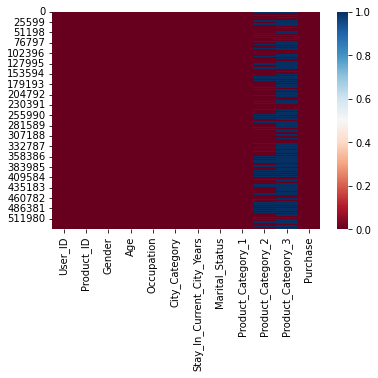

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(datafe.isnull(),cmap='RdBu');

C:\Users\tharaniv\AppData\Local\Temp\ipykernel_6768\3998652027.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(datafe.drop('User_ID',1).corr(method='spearman'), annot=True,cmap='coolwarm');


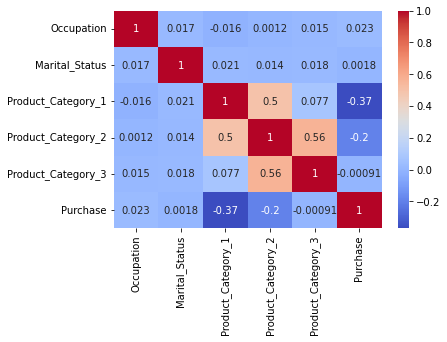

In [6]:
sns.heatmap(datafe.drop('User_ID',1).corr(method='spearman'), annot=True,cmap='coolwarm');

C:\Users\tharaniv\AppData\Local\Temp\ipykernel_6768\2576733719.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(datafe.drop('User_ID',1).corr(method='pearson'), annot=True,cmap='coolwarm');


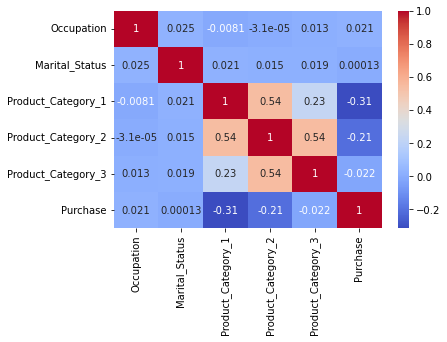

In [7]:
sns.heatmap(datafe.drop('User_ID',1).corr(method='pearson'), annot=True,cmap='coolwarm');

In [8]:
datafe1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,1.000791e+06,8.433700,0.405300,5.292800,9.796359,12.811144,9152.487700
std,4.402229e+02,6.660333,0.490975,3.660739,5.055550,4.057049,4881.543001
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.000403e+06,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,1.000817e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8021.500000
75%,1.001172e+06,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,1.001530e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [9]:
datafe1.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3243
Product_Category_3            7003
Purchase                         0
dtype: int64

In [10]:
numeric_features = [feature for feature in datafe.columns if datafe[feature].dtype!='O']
categorical_features = [feature for feature in datafe.columns if datafe[feature].dtype =='O']

In [11]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

We have 5 categorical features : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


# UNIVARIATE ANALYSIS

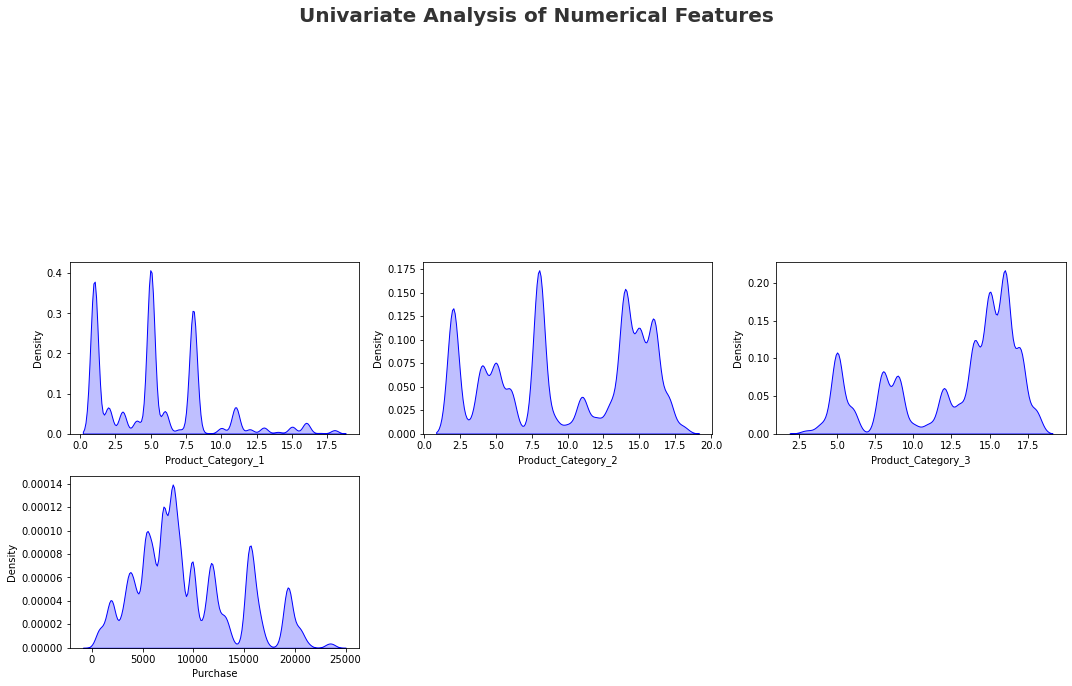

In [12]:
#Numeric Features:

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(3, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=datafe[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [13]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
datafe1['Product_Category_1'] = datafe1['Product_Category_1'].replace(0,datafe1['Product_Category_1'].mean())
datafe1['Product_Category_2'] = datafe1['Product_Category_2'].replace(0,datafe1['Product_Category_2'].mean())
datafe1['Product_Category_3'] = datafe1['Product_Category_3'].replace(0,datafe1['Product_Category_3'].mean())


# checking for outliers


User_ID                   AxesSubplot(0.125,0.71587;0.133621x0.16413)
Occupation             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Marital_Status          AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Product_Category_1     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Product_Category_2     AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Product_Category_3       AxesSubplot(0.125,0.518913;0.133621x0.16413)
Purchase              AxesSubplot(0.285345,0.518913;0.133621x0.16413)
dtype: object

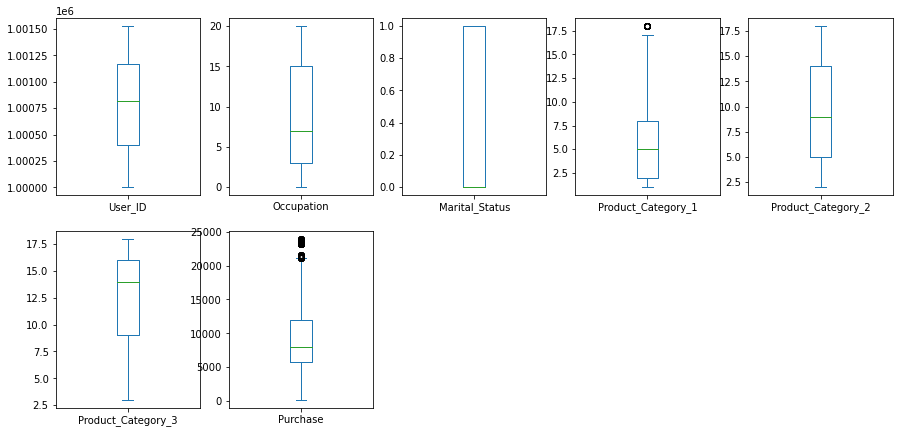

In [15]:
datafe1.iloc[:,0:12].plot(kind='box', subplots=True, layout=(4,5),figsize=(15,15))


In [16]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
pd.get_dummies(datafe1['Gender'])
               

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,0,1


In [18]:
## Handling categorical feature Gender

datafe1['Gender']=datafe1['Gender'].map({'F':0,'M':1})
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
## Handle categorical feature Age

datafe1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
# pd.get_dummies(df['Age'],drop_first=True)

datafe1['Age']=datafe1['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [21]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
datafe1['Age']= label_encoder.fit_transform(datafe1['Age'])
 
datafe1['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [22]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [23]:
##fixing categorical City_category

data_city=pd.get_dummies(datafe1['City_Category'],drop_first=True)

In [24]:
data_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [25]:
datafe1 = pd.concat([datafe1,data_city],axis=1)

In [26]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,0,1


In [27]:
#drop City_category

datafe1.drop('City_Category',axis=1,inplace=True)

In [28]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,NaN,NaN,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,NaN,NaN,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,NaN,1057,0,0
4,1000002,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,0,1


In [29]:
#Missing values

datafe1.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3243
Product_Category_3            7003
Purchase                         0
B                                0
C                                0
dtype: int64

In [30]:
## Focus on replacing missing values

datafe1['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [31]:
datafe1['Product_Category_2'].value_counts()

8.0     1196
14.0    1024
2.0      868
16.0     752
15.0     656
4.0      468
5.0      462
6.0      321
17.0     241
11.0     239
13.0     184
9.0      110
12.0      84
10.0      50
3.0       49
18.0      40
7.0       13
Name: Product_Category_2, dtype: int64

In [32]:
datafe1['Product_Category_2'].mode()[0]

8.0

In [33]:
## Replace the missing values with mode
datafe1['Product_Category_2']=datafe1['Product_Category_2'].fillna(datafe1['Product_Category_2'].mode()[0])

In [34]:
datafe1['Product_Category_2'].isnull().sum()

0

In [35]:
## Product_category 3 replace missing values
datafe1['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [36]:
datafe1['Product_Category_3'].value_counts()

16.0    614
15.0    481
14.0    353
17.0    335
5.0     290
8.0     234
9.0     195
12.0    183
13.0     90
18.0     66
6.0      62
11.0     31
4.0      25
10.0     23
3.0      15
Name: Product_Category_3, dtype: int64

In [37]:
## Replace the missing values with mode

datafe1['Product_Category_3']=datafe1['Product_Category_3'].fillna(datafe1['Product_Category_3'].mode()[0])

In [38]:
datafe.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
datafe1.shape

(10000, 13)

In [40]:
datafe1['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
datafe1['Stay_In_Current_City_Years']=datafe1['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\tharaniv\AppData\Local\Temp\ipykernel_6768\632683659.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datafe1['Stay_In_Current_City_Years']=datafe1['Stay_In_Current_City_Years'].str.replace('+','')


In [42]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,6,16,4,0,8,8.0,16.0,7969,0,1


In [43]:
datafe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10000 non-null  int64  
 1   Product_ID                  10000 non-null  object 
 2   Gender                      10000 non-null  int64  
 3   Age                         10000 non-null  int64  
 4   Occupation                  10000 non-null  int64  
 5   Stay_In_Current_City_Years  10000 non-null  object 
 6   Marital_Status              10000 non-null  int64  
 7   Product_Category_1          10000 non-null  int64  
 8   Product_Category_2          10000 non-null  float64
 9   Product_Category_3          10000 non-null  float64
 10  Purchase                    10000 non-null  int64  
 11  B                           10000 non-null  uint8  
 12  C                           10000 non-null  uint8  
dtypes: float64(2), int64(7), object(

In [44]:
##convert object into integers

datafe1['Stay_In_Current_City_Years']=datafe1['Stay_In_Current_City_Years'].astype(int)
datafe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10000 non-null  int64  
 1   Product_ID                  10000 non-null  object 
 2   Gender                      10000 non-null  int64  
 3   Age                         10000 non-null  int64  
 4   Occupation                  10000 non-null  int64  
 5   Stay_In_Current_City_Years  10000 non-null  int32  
 6   Marital_Status              10000 non-null  int64  
 7   Product_Category_1          10000 non-null  int64  
 8   Product_Category_2          10000 non-null  float64
 9   Product_Category_3          10000 non-null  float64
 10  Purchase                    10000 non-null  int64  
 11  B                           10000 non-null  uint8  
 12  C                           10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7

In [45]:
datafe1['B']=datafe1['B'].astype(int)
datafe1['C']=datafe1['C'].astype(int)

In [46]:
datafe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10000 non-null  int64  
 1   Product_ID                  10000 non-null  object 
 2   Gender                      10000 non-null  int64  
 3   Age                         10000 non-null  int64  
 4   Occupation                  10000 non-null  int64  
 5   Stay_In_Current_City_Years  10000 non-null  int32  
 6   Marital_Status              10000 non-null  int64  
 7   Product_Category_1          10000 non-null  int64  
 8   Product_Category_2          10000 non-null  float64
 9   Product_Category_3          10000 non-null  float64
 10  Purchase                    10000 non-null  int64  
 11  B                           10000 non-null  int32  
 12  C                           10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

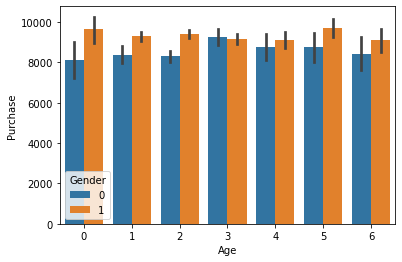

In [47]:
##Visualisation Age vs Purchased

sns.barplot('Age','Purchase',hue='Gender',data=datafe1)

# Purchasing of men is high then women

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

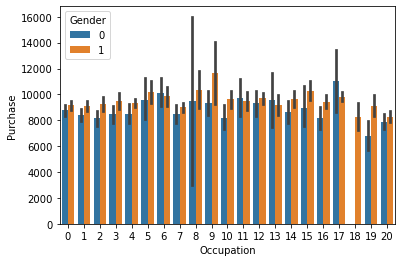

In [48]:
## Visualization of Purchase with occupation

sns.barplot('Occupation','Purchase',hue='Gender',data=datafe1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

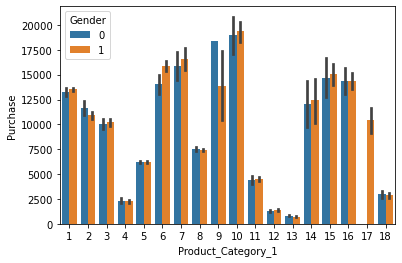

In [49]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=datafe1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

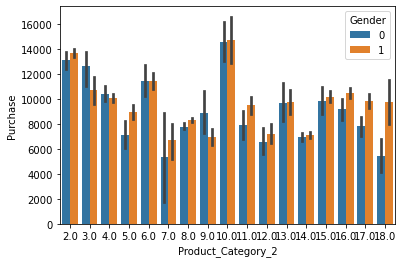

In [50]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=datafe1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

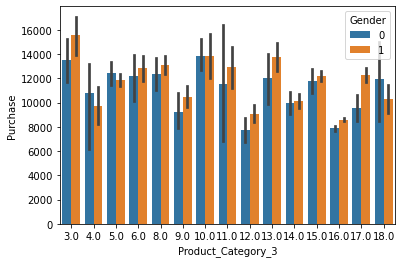

In [51]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=datafe1)

In [52]:
data = datafe1.drop('Product_ID', axis=1)

In [53]:
data.head()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,1000001,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,1000001,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,1000002,1,6,16,4,0,8,8.0,16.0,7969,0,1


In [54]:
##Feature Scaling 

data1=data[data['Purchase'].isnull()]

In [55]:
x=data.drop('Purchase',axis=1)
y=data['Purchase']

In [56]:
x.head()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000001,0,0,10,2,0,3,8.0,16.0,0,0
1,1000001,0,0,10,2,0,1,6.0,14.0,0,0
2,1000001,0,0,10,2,0,12,8.0,16.0,0,0
3,1000001,0,0,10,2,0,12,14.0,16.0,0,0
4,1000002,1,6,16,4,0,8,8.0,16.0,0,1


In [57]:
x.shape

(10000, 11)

In [58]:
y.shape

(10000,)

In [59]:
y

0        8370
1       15200
2        1422
3        1057
4        7969
        ...  
9995     7967
9996     8590
9997    13147
9998     5975
9999     8653
Name: Purchase, Length: 10000, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [61]:
## feature Scaling 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [62]:
X_train.shape

(7000, 11)

In [63]:
from sklearn.ensemble import RandomForestRegressor

 # create regressor object

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

 # fit the regressor with x and y data

regressor.fit(x, y) 


RandomForestRegressor(random_state=0)

In [64]:
y_pred = regressor.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:
#import matrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 5667.2785237222215
MSE: 41467513.58176035
RMSE: 6439.527434661673
